In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 36s 3us/step


In [3]:
len(X_train)

60000

In [5]:
len(X_test)

10000

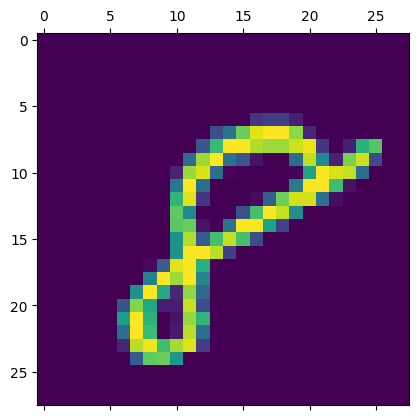

In [18]:
plt.matshow(X_train[59999])

In [43]:
X_train = X_train/255
X_test = X_test/255

In [44]:
X_train_flatten = X_train.reshape(len(X_train), 28*28)

In [45]:
X_test_flatten = X_test.reshape(len(X_test), 28*28)

In [46]:
X_train_flatten.shape

(60000, 784)

In [69]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape= (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2729 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1233 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0864 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0638 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0518 - accuracy: 0.9845


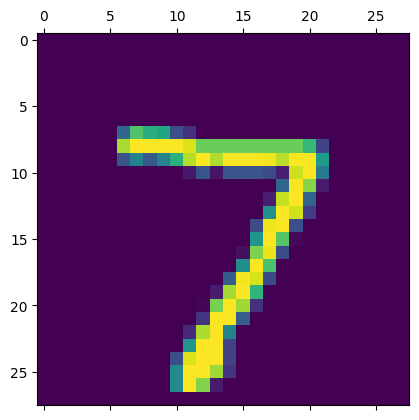

In [70]:
plt.matshow(X_test[0])

In [71]:
y_predicted = model.predict(X_test_flatten)

313/313 [==============================] - 1s 2ms/step


In [72]:
np.argmax(y_predicted[0])

7

In [73]:
y_predicted = [np.argmax(i) for i in y_predicted]

In [74]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted)

In [75]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    2,    1,    0,    1,    1,    2,    0],
       [   0, 1122,    2,    1,    0,    0,    2,    1,    7,    0],
       [   5,    2, 1002,    4,    1,    0,    1,    5,   11,    1],
       [   0,    0,    3,  993,    0,    1,    0,    3,    5,    5],
       [   2,    1,    3,    0,  961,    0,    4,    0,    1,   10],
       [   4,    2,    0,   15,    2,  855,    2,    2,    7,    3],
       [  11,    3,    2,    1,    6,    5,  927,    0,    3,    0],
       [   2,    6,    8,    3,    2,    0,    0,  993,    5,    9],
       [   7,    1,    1,   14,    6,    4,    1,    2,  936,    2],
       [   5,    1,    0,    6,   14,    0,    0,    5,    3,  975]])>

In [76]:
import seaborn as sns

<Axes: >

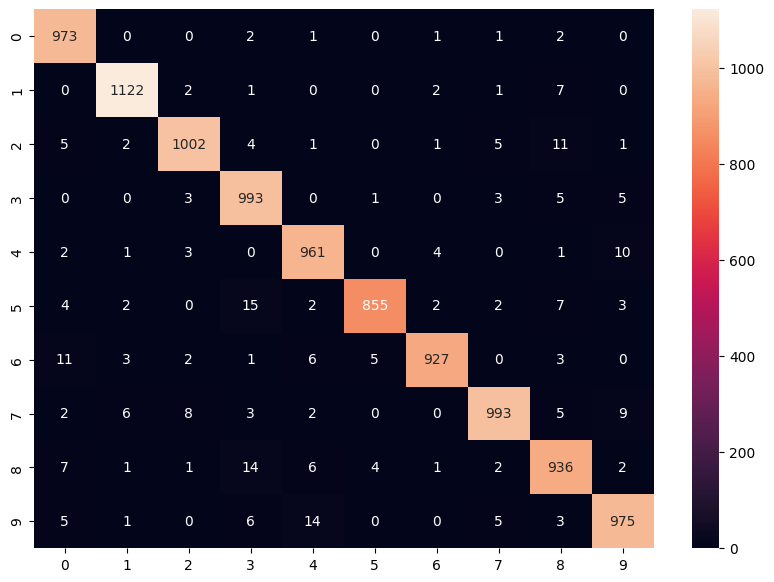

In [77]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')